# Исследование интернет-магазина по продаже компьютерных игр.

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры и нам необходимо провести исследование. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В нашем распоряжении данные до 2016 года и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными.

В наборе данных попадается аббревиатура **ESRB (Entertainment Software Rating Board)** — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Датафрейм имеет следующую структуру:**

**Name** — название игры.\
**Platform** — платформа.\
**Year_of_Release** — год выпуска.\
**Genre** — жанр игры.\
**NA_sales** — продажи в Северной Америке.(миллионы проданных копий)\
**EU_sales** — продажи в Европе.(миллионы проданных копий)\
**JP_sales** — продажи в Японии.(миллионы проданных копий)\
**Other_sales** — продажи в других странах.(миллионы проданных копий)\
**Critic_Score** — оценка критиков.(максимум 100)\
**User_Score** — оценка пользователей.(максимум 10)\
**Rating** — рейтинг от организации ESRB.

**Цель исследования:** Нам необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Ход исследоввания:** Изучим файлы с данными games.csv, оценим качество. Найдем и изучим пропущенные значения в столбцах, рассмотрим типы данных в каждом столбце, проверим уникальные значения в столбце с названиями и устраним неявные дубликаты, проведем исследовательский и статистический анализы данных, проверим несколько гипотез для подведения итогов и возможности сделать акцент на потенциально коммерчески успешный продукт.

**Исследование пройдет в шесть этапов:**

1) Предобработка данных.
2) Добавление в таблицу новых столбцов по необходимым параметрам.
3) Проведение исследовательского анализа данных.
4) Проведение статистического анализа данных.
5) Проверка гипотез.
6) Подведение итогов, фиксация итоговых выводов.

# 1. Откроем файл с данными и изучим общую информацию. 

Импортируем необходимые библиотеки. Считаем данные из csv-файла в датафрейм и сохраним в переменную data_games. Путь к файлам: /Users/Slava/Desktop/Яндекс Практикум учебные материалы/Проекты/Проект5.

In [1]:
# импортируем библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from scipy import stats as st

In [2]:
# прочитаем данные из csv-файла в датафрейм и сохраним в переменную 
try:
    data_games = pd.read_csv('/Users/Slava/Desktop/Яндекс Практикум учебные материалы/Проекты/Проект5./games.csv', sep = ',')
except: 
     data_games = pd.read_csv('/datasets/games.csv', sep = ',') 

In [3]:
# ознакомимся с общей информацией о данных
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# выведем первые 10 строк датафрейма с информацией о играх
data_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
# посмотрим наличие и количество пропусков в данных
data_games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Выведем уникальные значения столбцов. 

In [6]:
pd.set_option('max_colwidth', 200)
pd.DataFrame(data_games.apply(pd.unique)).rename(columns={0:'Уникальные значения столбцов'})

,Уникальные значения столбцов
Name,"[Wii Sports, Super Mario Bros., Mario Kart Wii, Wii Sports Resort, Pokemon Red/Pokemon Blue, Tetris, New Super Mario Bros., Wii Play, New Super Mario Bros. Wii, Duck Hunt, Nintendogs, Mario Kart D..."
Platform,"[Wii, NES, GB, DS, X360, PS3, PS2, SNES, GBA, PS4, 3DS, N64, PS, XB, PC, 2600, PSP, XOne, WiiU, GC, GEN, DC, PSV, SAT, SCD, WS, NG, TG16, 3DO, GG, PCFX]"
Year_of_Release,"[2006.0, 1985.0, 2008.0, 2009.0, 1996.0, 1989.0, 1984.0, 2005.0, 1999.0, 2007.0, 2010.0, 2013.0, 2004.0, 1990.0, 1988.0, 2002.0, 2001.0, 2011.0, 1998.0, 2015.0, 2012.0, 2014.0, 1992.0, 1997.0, 199..."
Genre,"[Sports, Platform, Racing, Role-Playing, Puzzle, Misc, Shooter, Simulation, Action, Fighting, Adventure, Strategy, nan]"
NA_sales,"[41.36, 29.08, 15.68, 15.61, 11.27, 23.2, 11.28, 13.96, 14.44, 26.93, 9.05, 9.71, 9.0, 8.92, 15.0, 9.01, 7.02, 9.43, 12.78, 4.74, 6.38, 10.83, 9.54, 9.66, 8.41, 6.06, 3.43, 5.51, 6.85, 9.04, 5.89,..."
EU_sales,"[28.96, 3.58, 12.76, 10.93, 8.89, 2.26, 9.14, 9.18, 6.94, 0.63, 10.95, 7.47, 6.18, 8.03, 4.89, 8.49, 9.09, 0.4, 3.75, 9.2, 4.46, 2.71, 3.44, 5.14, 5.49, 3.9, 5.35, 3.17, 5.09, 4.24, 5.04, 5.86, 3...."
JP_sales,"[3.77, 6.81, 3.79, 3.28, 10.22, 4.22, 6.5, 2.93, 4.7, 0.28, 1.93, 4.13, 7.2, 3.6, 0.24, 2.53, 0.98, 0.41, 3.54, 4.16, 6.04, 4.18, 3.84, 0.06, 0.47, 5.38, 5.32, 5.65, 1.87, 0.13, 3.12, 0.36, 0.11, ..."
Other_sales,"[8.45, 0.77, 3.29, 2.95, 1.0, 0.58, 2.88, 2.84, 2.24, 0.47, 2.74, 1.9, 0.71, 2.15, 1.69, 1.77, 3.96, 10.57, 0.55, 2.04, 1.36, 0.42, 0.46, 1.41, 1.78, 0.5, 1.18, 0.8, 1.16, 1.32, 0.59, 2.38, 1.13, ..."
Critic_Score,"[76.0, nan, 82.0, 80.0, 89.0, 58.0, 87.0, 91.0, 61.0, 97.0, 95.0, 77.0, 88.0, 83.0, 94.0, 93.0, 85.0, 86.0, 98.0, 96.0, 90.0, 84.0, 73.0, 74.0, 78.0, 92.0, 71.0, 72.0, 68.0, 62.0, 49.0, 67.0, 81.0..."
User_Score,"[8, nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9, 7.9, 8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2, 9.2, 7, 7.3, 4.3, 7.6, 5.7, 5, 9.1, 6.5, tbd, 8.8, 6.9, 9.4, 6.8, 6.1..."


### Вывод:

По результату вывода информации о датафрейме видим, что присутствуют пропуски.\
Наименование столбцов необходимо привести к нижниму регистру.

Столбец 'Year_of_Release' содержит год издания игры, соответственно год - целое число. Столбец необходимо привести к целочисленному типу - int.\
Судя по данным в столбце 'Critic_Score' содержатся только целые числа, так же приведем его к целочисленному типу - int.\
Столбец 'User_Score' содержит оценку пользователей, необходимо приветсти к вещественному типу данных - float.

В столбце User_Score помимо пропусков присутствует значение 'tbd' ('to be determined' - 'будет определено'), означающее, что оценка игры на момент занесения в БД отсутствовала.

Значительное количество пропусков в столбцах 'year_of_release', 'critic_score', 'user_score', 'rating'. Изучим их поподробнее.

# 2. Предобработка данных

## 2.1 Приведем названия столбцов к нижнему регистру.

In [7]:
columns_lower = [column.lower() for column in data_games.columns]
data_games.columns = columns_lower
data_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## 2.2 Обработка пропусков.

In [8]:
# построим тепловую карту пропусков
pd.DataFrame(round(data_games.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


По результату видим, что пропуски имеются в большей части столбцов: 'name', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating'.

Пропуски в столбце 'name' вероятно связаны с ошибками в процессе заполнения данных, в столбце 'genre' возможно с тем, что жанр данных игр трудно определить. Информацию о пропущенных значениях в данных стобцах попробуем найти на просторах интернета, так как их всего по два в каждом, но прежде найдем данные строки и оценим остальную информацию в них.

Пропуски в столбцах 'critic_score', 'user_score', 'rating': рейтинг и оценки критиков являются уникальными данными, присваиваемые каждой игре индивидуально. Такие данные невозможно восстановить с учетом их количества.


### 2.2.1 Пропуски столбцов 'name' и 'genre'.

In [9]:
# выведем строки с пропусками столбца 'name'
data_games[data_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Найденные строки так же имеют пропуски в столбце 'genre', именно их мы и увидели ранее.
Учитывая тот факт, что в строках пропусков столбца 'name' и 'genre' отсутствует и остальная информация: 'critic_score', 'user_score', 'rating', найти информацию и заполнить пропуски не представляется возможным. Исключим данные строки из датафрейма.

In [10]:
data_games = data_games.dropna(subset=['name']).reset_index(drop=True)
# проверим
data_games['name'].isna().sum()

0

### 2.2.2 Пропуски столбца 'year_of_release'.

In [11]:
# выведем строки с пропусками столбца 'year_of_release'
data_games[data_games['year_of_release'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
718,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
804,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Можно обратить внимание, что в столбце названия спортивных игр часто встречается упоминание года или сезона, соответственно релиз игры происходит накануне года указанного в названии. Этим можно воспользоваться и заполнить пропуски столбца 'year_of_release', однако вариаций написания очень много: Madden NFL 11, MLB SlugFest 20-03, NASCAR Thunder 2003. В своём большинестве пропуски относятся к 'вымершим' платформам на 2006 год.

К тому же пропусков менее 1%, а игры без года создания не нужны, отбросим их.

In [12]:
data_games = data_games.dropna(subset=['year_of_release']).reset_index(drop=True)
# проверим
data_games['year_of_release'].isna().sum()

0

### 2.2.3 Пропуски столбца 'user_score'.

В столбце большое количество пропусков, так же некоторое количество оценок имеют значение 'tbd'. Заменим пропуски индикаторным значением -1. Таким образом и от пропусков избавимся и данные сохраним.

In [13]:
# преобразуем тип данных перед внесением изменений
data_games['user_score'] = pd.to_numeric(data_games['user_score'], downcast='float', errors ='coerce')
# заменим значения на -1
data_games.loc[(data_games['user_score'] == 'tbd') | (data_games['user_score'].isna()), 'user_score'] = -1
# проверим результат
data_games.user_score.sort_values().unique()

array([-1. ,  0. ,  0.2,  0.3,  0.5,  0.6,  0.7,  0.9,  1. ,  1.1,  1.2,
        1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,
        2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,
        3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,
        4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,
        5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  6.7,
        6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,
        7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,  8.9,
        9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7], dtype=float32)

### 2.2.4 Пропуски столбцов 'rating', 'critic_score'.

Учитывая, что пропущенные значения оценок критиков и рейтингов ESRB точно заменить не представляется возможным, заменим пропущенные значения так же на -1.

In [14]:
for column in ['critic_score', 'rating']:
    data_games.loc[data_games[column].isna(), column] = -1
data_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,-1
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,-1
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,-1
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,-1


In [15]:
# проверим датасет в на пропуски
data_games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

## 2.3 Преобразуем типы данных.

In [16]:
# изменим тип данных столбца 'year_of_release'
data_games['year_of_release'] = pd.to_numeric(data_games['year_of_release'], downcast='integer')
data_games['critic_score'] = pd.to_numeric(data_games['critic_score'], downcast='integer')
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int16  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int8   
 9   user_score       16444 non-null  float32
 10  rating           16444 non-null  object 
dtypes: float32(1), float64(4), int16(1), int8(1), object(4)
memory usage: 1.1+ MB


## 2.4 Обработка дубликатов.

### 2.4.1 Проверим наличие явных дубликатов.

In [17]:
data_games.duplicated().sum()

0

**Явные дубликаты отсутствуют.**

### 2.4.2 Проверим наличие неявных дубликатов.

In [18]:
# проверим наличие неявных дубликатов
data_games[data_games.duplicated(subset=['name', 'platform', 'year_of_release'])].value_counts()

name           platform  year_of_release  genre   na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  rating
Madden NFL 13  PS3       2012             Sports  0.0       0.01      0.0       0.0          83            5.5         E         1
dtype: int64

Найден один очевидный дубликат, так как значения повторяются в 3 столбцах 'name', 'platform', 'year_of_release'.

In [19]:
# удалим найденную строку, повторяющую свои значения в столбцах 'name', 'platform', 'year_of_release'
data_games = data_games.drop_duplicates(subset=['name', 'platform', 'year_of_release'])
# проверим
data_games[data_games.duplicated(subset=['name', 'platform', 'year_of_release'])].value_counts()

Series([], dtype: int64)

## 2.5 Расчёт суммарных продаж.

In [20]:
data_games['total_sales'] = data_games.loc[:, ('na_sales', 'eu_sales', 'jp_sales', 'other_sales')].sum(axis=1)

In [21]:
data_games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
8105,The King of Fighters '97,PS,1998,Fighting,0.00,0.00,0.16,0.01,-1,-1.0,-1,0.17
14123,The Sims 2: Glamour Life Stuff,PC,2006,Simulation,0.00,0.03,0.00,0.01,-1,6.7,T,0.04
2846,Madden NFL 09,PSP,2008,Sports,0.65,0.00,0.00,0.06,68,6.5,E,0.71
451,World Class Track Meet,NES,1986,Sports,1.92,0.45,0.64,0.07,-1,-1.0,-1,3.08
16065,MXGP 2,PC,2016,Racing,0.00,0.01,0.00,0.00,-1,-1.0,-1,0.01
1082,NCAA Football 2004,PS2,2003,Sports,1.35,0.09,0.00,0.23,94,8.8,E,1.67
11581,Wizardry: Llylgamyn Saga,PS,1998,Role-Playing,0.00,0.00,0.07,0.00,-1,-1.0,-1,0.07
1877,Virtua Fighter 5,PS3,2007,Fighting,0.29,0.51,0.08,0.20,85,7.4,T,1.08
10353,NASCAR The Game: Inside Line,X360,2012,Racing,0.09,0.00,0.00,0.01,72,3.4,E,0.10
7852,Treasures of the Deep,PS,1997,Action,0.10,0.07,0.00,0.01,-1,-1.0,-1,0.18


Вывод:

Данные подготовлены к анализу.

Наименование столбцов приведен к нижниму регистру.

Проверено наличие явных и неявных дубликатов.
Явные дубликаты отсутствовали, однако нашли один неявный дубликат и исключили его из датасета.

В данных присутствовало значительное количество пропусков, вероятно возникшее в процессе сбора данных из разных источников или в системе были какие-то сбои при логировании.
Так же, возможно, возникли технические проблемы при передаче или хранении данных. Ко всему прочему, пропуски в рейтинговых столбцах может быть связано с отсутствием на момент выхода игры (если игра вышла до 1995) развитых рейтинговых площадок.

Строки с пропусками в столбцах 'name' и 'genre' были исключены.\
Строки столбца 'year_of_release' в которых отсутствует год так же исключены, т.к. пропусков менее 1% и нет главного признака - год, что не позволяет сделать анализ в принципе.  
Лучше работать с меньшим количеством данных хорошего качества.

Тип столбца 'Year_of_Release' приведен к целочисленному типу - int.\
Тип столбца 'User_Score' приведен к вещественному типу данных - float.

В столбце User_Score присутствует значение 'tbd' ('to be determined' - 'будет определено'), означающее, что оценка игры на момент занесения в БД отсутствовала. Для проведения корректного анализа, мы заменили данные значение и 'Nan' на -1 для отсутствия пиков на графиках для данных значений. Учитем это в процессе анализа.\
Аналогичным образом поступили с пропущенными значениями столбцов 'rating', 'critic_score'.

Создан дополнительный столбец с данными о суммарных продажах по всем регионам. 

# 3. Исследовательский анализ данных

Для проведения исследовательского анализа, нам необходимо предпринять следующие действия и ответить на следующие вопросы:

1) **Проанализировать сколько игр выпускалось в разные годы.** Выяснить важны ли данные за все периоды.
2) **Проанализировать, как менялись продажи по платформам.** Необходимо выберать платформы с наибольшими суммарными продажами и построить распределение по годам. Выяснить за какой характерный срок появляются новые и исчезают старые платформы.
3) **Сделать срез за соответствующий актуальный период, без учета в работе данных за предыдущие годы.**
4) **Выяснить какие платформы лидируют по продажам, какие растут и какие падают.** Выбрать несколько потенциально прибыльных платформ.
5) **Построить график boxplot по глобальным продажам игр в разбивке по платформам.** Описать результат.
6) **Проанализировать, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.** Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
7) **Соотнести выводы с продажами игр на других платформах.**
8) **Проанализировать общее распределение игр по жанрам.** Сделать выводы о самых прибыльных жанрах. Проанализировать выделяются ли жанры с высокими и низкими продажами.

## 3.1 Проанализируем сколько игр выпускалось в разные годы.

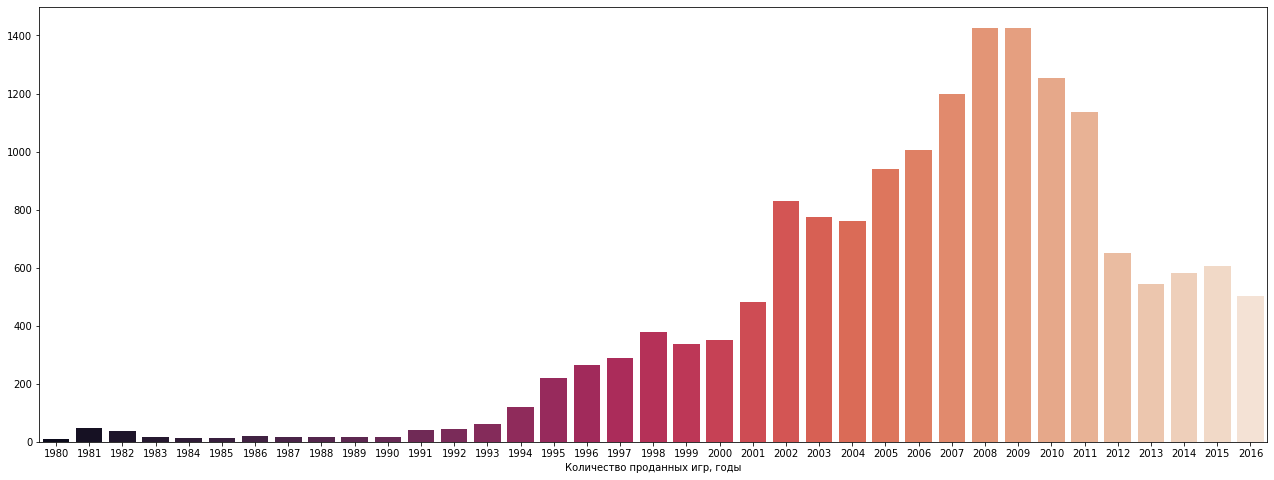

In [22]:
# создадим сводную таблицу sales_in_diff_years
sales_in_diff_years = data_games.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = ('count'))
sales_in_diff_years.columns = ['count']
# построим столбчатую диаграмму и оценим результат
f, ax = plt.subplots(figsize=(22, 8))
ax = sns.barplot(x=sales_in_diff_years.index, y='count', data=sales_in_diff_years, palette='rocket')
plt.xlabel('Количество проданных игр, годы')
plt.ylabel('')
plt.show()

По диаграмме видно, что начиная с 1993 года в мире растет число продаж игр и игровая индустрия интенсивно равивается. Тенденция выпускать больше игр пришла вместе с технологическим прорывом: появлением почти в каждом доме персонального компьютера и технологий языков программирования. 

После 2009 года наблюдаентся резкий спад спроса. К 2012 году количество продаж снизилось вдвое по сравнению с успехами 2008 - 2009 годов. Вероятнее всего это связано с долгосрочными последствиями мирового экономического кризиса начавшимся в конце 2007 - начале 2008 годов. 

Данные до 1994 года, на заре развития индустрии не несут в себе необходимой для анализа информации.

## 3.2 Проанализируем, как менялись продажи по платформам.

### 3.2.1 Выясним за какой характерный срок появляются новые и исчезают старые платформы.

In [23]:
# создадим сводную таблицу с количеством упоминаний платформ по годам
lifetime_platform = (data_games.loc[:,['year_of_release', 'platform']]
        .drop_duplicates()
        .pivot_table(index=['platform'], values='year_of_release', aggfunc='count')
       )
# проверим результат
lifetime_platform

,year_of_release
platform,
2600,10
3DO,2
3DS,6
DC,7
DS,11
GB,13
GBA,8
GC,7
GEN,5


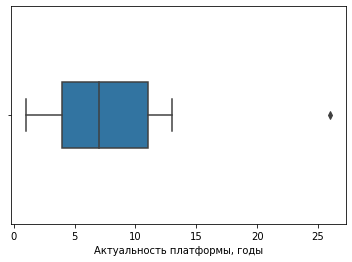

In [24]:
# построим диаграмму размаха
sns.boxplot(
x=lifetime_platform.year_of_release,
width=.3
)
plt.xlabel('Актуальность платформы, годы')
plt.show()

In [25]:
# посмотрим информацю о полученных данных
lifetime_platform.year_of_release.describe()

count    31.000000
mean      7.677419
std       5.081910
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      26.000000
Name: year_of_release, dtype: float64

Таким образом, средняя продолжительность жизни игровой платформы, в течение которого она приносит деньги, составляет 7 лет. Далее она теряет свою актуальность в связи с выпуском новых игровых платформ.

### 3.2.2 Найдем платформы с наибольшими суммарными продажами и построим распределение по годам. 

Посмотрим топ 10 платформ по количеству продаж.

In [26]:
# создадим сводную таблицу sales_by_platform
top_sales_by_platform = pd.pivot_table(data_games, index = 'platform', values = 'total_sales', aggfunc = 'sum').nlargest(10, 'total_sales')
# посмотрим результат
top_sales_by_platform

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Видим, что в тройке лидеров такие платформы как: PS2, X360, PS3. Так же мы наблюдали, что и продолжительность актуальности данных платформ так же высока.

Обратимся к ранее созданной сводной таблице 'sales_in_diff_years' и рассмотрим разбиение продаж по каждой платформе из топ-10 по годам, предварительно отбросим неинтересующий нас период до 1994 года.

In [27]:
sales_in_diff_years = data_games.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
sales_in_diff_years.fillna(0, inplace=True)
# создадим цикл который вернёт все значения из переменной 'sales_in_diff_years' с учетом топ-10 платформ.
for platform in sales_in_diff_years.columns:
    if platform not in top_sales_by_platform.index:
        sales_in_diff_years.drop(platform, axis=1, inplace=True)
sales_in_diff_years = sales_in_diff_years[sales_in_diff_years.index >= 1994]
# проверим результат
sales_in_diff_years

platform,3DS,DS,GBA,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
1994,0.00,0.00,0.00,6.03,0.00,0.00,0.00,0.00,0.00,0.00
1995,0.00,0.00,0.00,35.96,0.00,0.00,0.00,0.00,0.00,0.00
1996,0.00,0.00,0.00,94.70,0.00,0.00,0.00,0.00,0.00,0.00
1997,0.00,0.00,0.00,136.17,0.00,0.00,0.00,0.00,0.00,0.00
1998,0.00,0.00,0.00,169.49,0.00,0.00,0.00,0.00,0.00,0.00
1999,0.00,0.00,0.00,144.53,0.00,0.00,0.00,0.00,0.00,0.00
2000,0.00,0.00,0.07,96.37,39.17,0.00,0.00,0.00,0.00,0.00
2001,0.00,0.00,61.53,35.59,166.43,0.00,0.00,0.00,0.00,0.00
2002,0.00,0.00,74.16,6.67,205.38,0.00,0.00,0.00,0.00,0.00


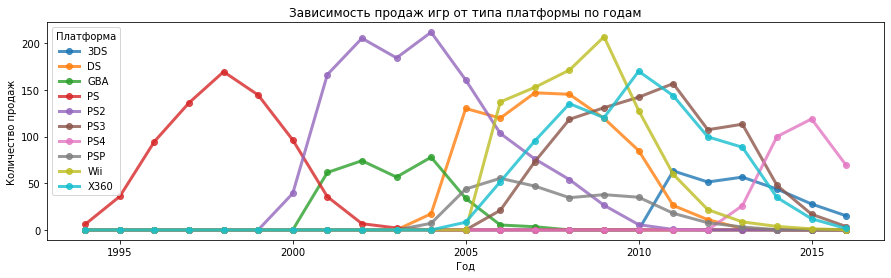

In [28]:
# построим график зависимости количества продаж от типа платформы и года
sales_in_diff_years.plot(marker='o', linewidth = 3, figsize=(15, 4), alpha= 0.8)
plt.title('Зависимость продаж игр от типа платформы по годам')
plt.legend(title='Платформа')
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.show()

По графику видно, что единственной платформой имеющей коммерческий успех это PS4, остальные платформы находятся в своей конечной фазе коммерческого существования.

## 3.3 Сделем срез данных за соответствующий актуальный период.

Как было сказано выше, в своей активной коммерческой фазе пребывает платформа PS4, тогда как лидеры по продажам 2011 - 2013 гг: PS3 и X360, — к 2015-2016 гг. уже исчерпали свой коммерческий ресурс.

In [29]:
# cделем срез за соответствующий актуальный период
sales_in_diff_years = sales_in_diff_years[sales_in_diff_years.index >= 2013]

## 3.4 Выбор платформ лидирующих по продажам.

Поскольку мы выяснили, что в среднем платформа живет около 7 лет, то за актуальный период можно взять 2013-2016 гг. Это период активной фазы платформы PS4, вклад остальных платформ в прогноз 2017 года не значителен. Выберем её как потенциально прибыльную.

## 3.5 Глобальные продажам игр в разбивке по платформам.

Построим график boxplot по глобальным продажам игр в разбивке по платформам и опишем результат.

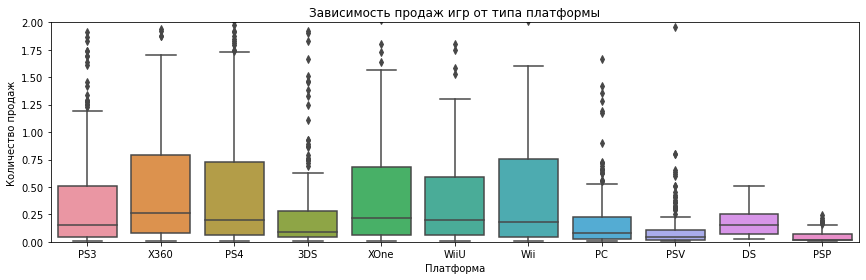

In [30]:
# сделаем срез данных исходного датасета по году
actual_target_data = data_games.query('year_of_release >= 2013')
# построим график
sns.boxplot(x="platform", 
            y='total_sales', 
            data=actual_target_data
)
plt.title('Зависимость продаж игр от типа платформы')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.tight_layout(rect=(0,0,2,1))
plt.ylim(0, 2)
plt.show()

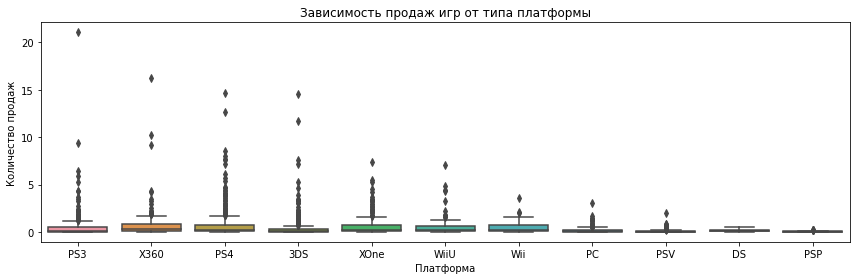

In [31]:
# построим график без ограничений по оси 'y', что бы оценить разброс значений
sns.boxplot(x="platform", 
            y='total_sales', 
            data=actual_target_data
)
plt.title('Зависимость продаж игр от типа платформы')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.tight_layout(rect=(0,0,2,1))
plt.show()

Важно заметить, что на платформы PS3, X360, PS4 и 3DS есть игры-бестселлеры, копий которых продано очень большое количество.

In [32]:
# посмотрим топ-10 продаж по платформам начиная с 2013 года
actual_target_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').nlargest(10, 'total_sales')

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


К лидерам по продажам за выбранный период времени(2013-2016 гг.) относятся PS4, PS3 и XOne. Самые низкие доходы от продаж игр на PSP, Wii, PSV, продажи игр на PSP составляют 1,3% от лидирующей консоли — PS4. При этом к лидерам по средним продажам относятся X360, XOne, WiiU и Wii.

## 3.6 Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы.

Рассмотрим влияние отзывов пользователей и критиков на продажи игр на примере платформы PS4 - лидера по продажам в период 2013-2016 гг.

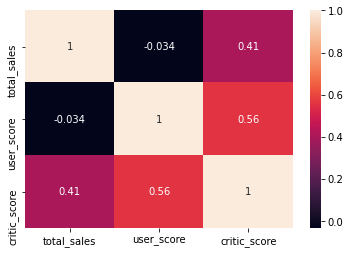

In [33]:
# сделаем срез данных по лидирующей платформе
ps_four = actual_target_data.query('platform == "PS4" and (user_score != -1) and (critic_score != -1)')
# посчитаем коэффициент корреляции для отзывов пользователей и критиков относительно объема продаж
sns.heatmap(ps_four.loc[:,['total_sales', 'user_score', 'critic_score']].corr(),annot=True);   

Построим диаграмму рассеяния между отзывами и продажами.

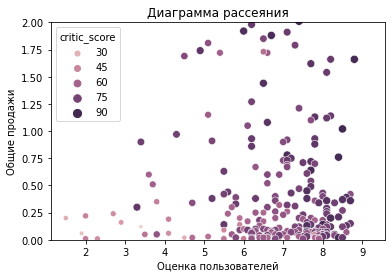

In [34]:
# построим диаграмму рассеяния
sns.scatterplot(data=ps_four, x='user_score', y='total_sales', hue = 'critic_score',size = 'critic_score')
plt.title('Диаграмма рассеяния')
plt.xlabel('Оценка пользователей')
plt.ylabel('Общие продажи')
plt.ylim(0,2)
plt.show()

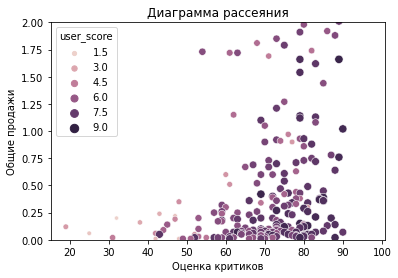

In [35]:
sns.scatterplot(data=ps_four, x='critic_score', y='total_sales', hue = 'user_score', size = 'user_score')
plt.title('Диаграмма рассеяния')
plt.xlabel('Оценка критиков')
plt.ylabel('Общие продажи')
plt.ylim(0,2)
plt.show()

По корреляционной матрице видно, что отзывы пользователей никак не влияют на продажи игр (связь отсутствует), в то время как отзывы критиков имеют некоторое влияние на продажи: коэффициенты корреляции -0,03 и 0,41 соответственно.

## 3.7 Сравнение влияния отзывов пользователей и критиков на продажи в других платформах.

Сравним влияние отзывов пользователей и критиков на продажи лидирующих платформ PS3 и XOne за выбранный период времени(2013-2016 гг.)

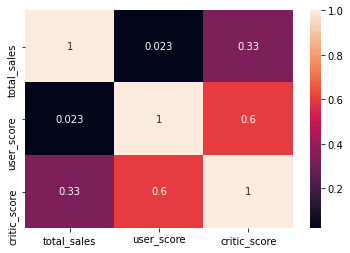

In [36]:
# сделаем срез данных по платформе PS3
ps_four = actual_target_data.query('platform == "PS3" and (user_score != -1) and (critic_score != -1)')
# посчитаем коэффициент корреляции для отзывов пользователей и критиков относительно объема продаж
sns.heatmap(ps_four.loc[:,['total_sales', 'user_score', 'critic_score']].corr(),annot=True);  

Результат более менее аналогичный. Можно наблюдать зависимость отзывов критиков и отзывами пользователей.

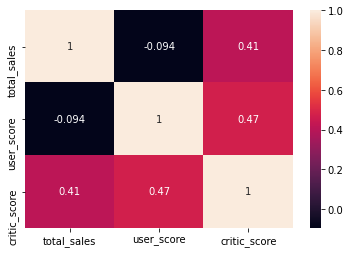

In [37]:
# сделаем срез данных по платформе XOne
ps_four = actual_target_data.query('platform == "XOne" and (user_score != -1) and (critic_score != -1)')
# посчитаем коэффициент корреляции для отзывов пользователей и критиков относительно объема продаж
sns.heatmap(ps_four.loc[:,['total_sales', 'user_score', 'critic_score']].corr(),annot=True);  

Выводы для других платформ аналогичны. Следовательно, для всех платформ характерно среднее влияние отзывов критиков на продажи и отсутствие влияния отзывов пользователей.

## 3.8 Проанализируем общее распределение игр по жанрам и о самых прибыльных жанрах.

In [38]:
# построим сводную таблицу популярности жанров, отсортированную по убыванию
genre_sales = actual_target_data.pivot_table(index='genre', values='total_sales', aggfunc='sum')
genre_sales.sort_values('total_sales', ascending=False)

,total_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


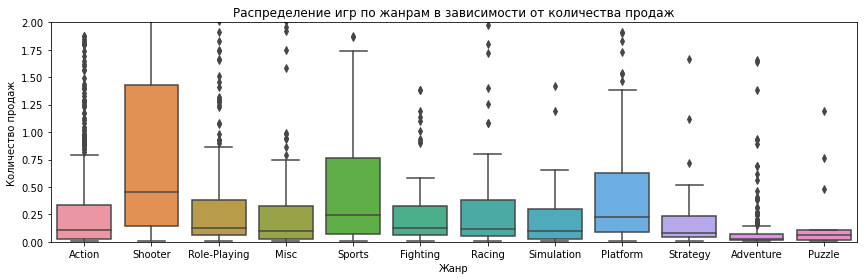

In [39]:
# построим график
sns.boxplot(x='genre', 
            y='total_sales', 
            data=actual_target_data
)
plt.title('Распределение игр по жанрам в зависимости от количества продаж')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')
plt.tight_layout(rect=(0,0,2,1))
plt.ylim(0,2)
plt.show()

По таблице и графику видно, что жанр 'shooter' по средним продажам лидирует по сравнению с остальными жанрами игр. Спортивные игры 'sports' и платформеры 'platform' так же имеют высокие продажи в среднем.\
Жанр 'action', наоборот, по этому критерию отстает, в тоже время является в целом самым популярным жанром из-за наибольшего объема продаж. Приключенческие игры 'adventure' и игры-головоломки 'puzzle' вызывают наименьший интерес среди пользователей. Их абсолютные и средние продажи одни из самых низких среди всех жанров.

Посмотрим, жанры самых продаваемых игр за все время:

In [40]:
# построим сводную таблицу популярности жанров самых продаваемых игр за все время
top_sales_genre = data_games.pivot_table(index=['name','genre'], values='total_sales', aggfunc='sum').nlargest(10, 'total_sales')
top_sales_genre.sort_values('total_sales', ascending=False)

,,total_sales
name,genre,
Wii Sports,Sports,82.54
Grand Theft Auto V,Action,56.58
Super Mario Bros.,Platform,45.31
Tetris,Puzzle,35.84
Mario Kart Wii,Racing,35.52
Wii Sports Resort,Sports,32.77
Pokemon Red/Pokemon Blue,Role-Playing,31.38
Call of Duty: Modern Warfare 3,Shooter,30.60
New Super Mario Bros.,Platform,29.80


Интересно, что в первой тройке отсутствует жанр 'shooter', а наоборот является одим из самых непродаваемых за все время. Вероятно, это связано с тем, что жанр 'shooter' в том виде, в котором мы его знаем на сегодняшней день относительно молодой и появился с развитием компьютерных технологий.\
В свою очередь самые популярные жанры самых продаваемых игр за все время: 'sports', 'action' и 'platform.


**Вывод:**

Начиная с 1993 года в мире растет число продаж игр и игровая индустрия интенсивно равивается. Тенденция выпускать больше игр пришла вместе с технологическим прорывом: появлением почти в каждом доме персонального компьютера и технологий языков программирования. После 2009 года наблюдаентся резкий спад спроса. К 2012 году количество продаж снизилось вдвое по сравнению с успехами 2008 - 2009 годов. Вероятнее всего это связано с долгосрочными последствиями мирового экономического кризиса начавшимся в конце 2007 - начале 2008 годов.

Данные до 1994 года, на заре развития индустрии не несут в себе необходимой для анализа информации.
В тройке лидеров по исходным данным такие платформы как: PS2, X360, PS3. Так же мы наблюдали, что и продолжительность актуальности данных платформ так же высока. По данным актуальным для проведения анализа, в своей активной коммерческой фазе на текущей момент пребывает платформа PS4, тогда как лидеры по продажам 2011 - 2013 гг: PS3 и X360, — к 2015-2016 гг. уже исчерпали свой коммерческий ресурс.

Мы выяснили, что в среднем платформа живет около 7 лет и за интересующий нас период взяли 2013-2016 гг. Это период активной фазы платформы PS4, поэтому выбрали её как потенциально прибыльную, вклад остальных платформ в прогноз 2017 года не значителен.
В целом к лидерам по продажам за выбранный период времени(2013-2016 гг.) относятся PS4, PS3 и XOne. Самые низкие доходы от продаж игр на PSP, Wii, PSV. При этом к лидерам по средним продажам относятся X360, XOne, WiiU и Wii.
Выяснили, что отзывы пользователей никак не влияют на продажи игр, в то время как отзывы критиков имеют некоторое влияние на продажи. Заметили зависимость отзывов критиков и отзывами пользователей.
Проверили, что для всех платформ характерно среднее влияние отзывов критиков на продажи и отсутствие влияния отзывов пользователей.
Определили, что жанр 'shooter' по средним продажам лидирует по сравнению с остальными жанрами игр. Спортивные игры 'sports' и платформеры 'platform' так же имеют высокие продажи в среднем.
Жанр 'action', наоборот, по этому критерию отстает, в тоже время является в целом самым популярным жанром из-за наибольшего объема продаж. Приключенческие игры 'adventure' и игры-головоломки 'puzzle' вызывают наименьший интерес среди пользователей. Их абсолютные и средние продажи одни из самых низких среди всех жанров.

Выяснили жанры самых продаваемых игр за все время:
Обнаружили что первой тройке отсутствует жанр 'shooter', а наоборот является одим из самых непродаваемых за все время. Вероятно, это связано с тем, что жанр 'shooter' в том виде, в котором мы его знаем на сегодняшней день относительно молодой и появился с развитием компьютерных технологий.
В свою очередь самые популярные жанры самых продаваемых игр за все время: 'sports', 'action' и 'platform.

# 4. Портрет пользователя каждого региона

## 4.1 Количество продаж игр по платформам в зависимости от региона.

Посмотрим количество продаж игр по платформам в зависимости от региона за выбранный актуальный период.

### 4.1.1 Северная Америка.

In [41]:
# построим сводную таблицу количества проданных копий игр по платформам с учётом региона
na_sales = actual_target_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').nlargest(5,'na_sales')
na_sales.sort_values('na_sales', ascending=False)

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


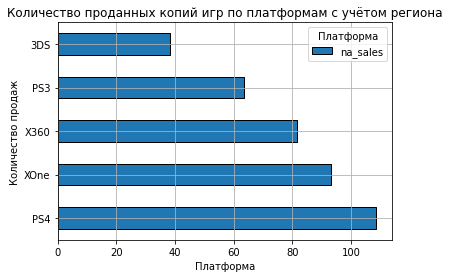

In [42]:
# визуализируем на графике полученную информацию
na_sales.plot(kind='barh', legend=True, grid=True, ec='black', figsize=(6, 4))
plt.title('Количество проданных копий игр по платформам с учётом региона')
plt.legend(title='Платформа')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.show()

В Cеверной Америке наибольшим спросом пользуются игры на полатформу PS4, что логично, так как в актуальном периоде данная платформа является самой популярной в мире.

### 4.1.2 Европа.

In [43]:
# построим сводную таблицу количества проданных копий игр по платформам с учётом региона
eu_sales = actual_target_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').nlargest(5,'eu_sales')
eu_sales.sort_values('eu_sales', ascending=False)

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


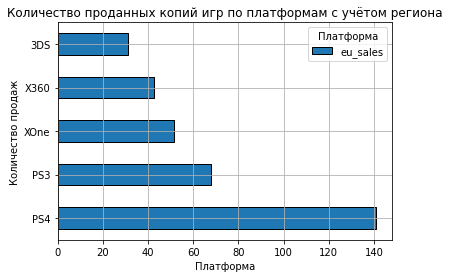

In [44]:
# визуализируем на графике полученную информацию
eu_sales.plot(kind='barh', legend=True, grid=True, ec='black', figsize=(6, 4))
plt.title('Количество проданных копий игр по платформам с учётом региона')
plt.legend(title='Платформа')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.show()

### 4.1.3 Азия.

In [45]:
# построим сводную таблицу количества проданных копий игр по платформам с учётом региона
jp_sales = actual_target_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').nlargest(5,'jp_sales')
jp_sales.sort_values('jp_sales', ascending=False)

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


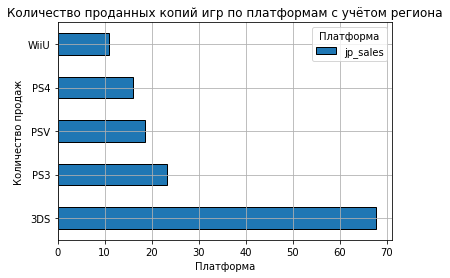

In [46]:
# визуализируем на графике полученную информацию
jp_sales.plot(kind='barh', legend=True, grid=True, ec='black', figsize=(6, 4))
plt.title('Количество проданных копий игр по платформам с учётом региона')
plt.legend(title='Платформа')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.show()

В Азии наибольшим спросом пользуются игры на полатформу 3DS.

Интересно, что если в Америке и Европе набор топ-5 платформ одинаковый и различается незначительно, то в Японии топ-5 кардинально другой.

В Америке и Европе самой популярной платформой является PS4, в то время как в Японии эта платформа занимает лишь четвертон место.
На первом месте в Японии платформа 3DS, которая на Западе, напротив, занимает по популярности последнее место из пяти.

## 4.2 Популярность жанров в зависимости от региона.

Посмотрим самые апопулярные жанры в зависимости от региона за выбранный актуальный период.

### 4.2.1 Северная Америка.

In [47]:
# построим сводную таблицу жанров игр с учётом региона
na_genre = actual_target_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').nlargest(5,'na_sales')
na_sales.sort_values('na_sales', ascending=False)

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


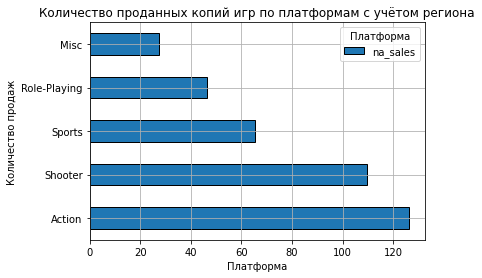

In [48]:
# визуализируем на графике полученную информацию
na_genre.plot(kind='barh', legend=True, grid=True, ec='black', figsize=(6, 4))
plt.title('Количество проданных копий игр по платформам с учётом региона')
plt.legend(title='Платформа')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.show()

В Cеверной Америке наибольшим спросом пользуются жанры 'action' и 'shooter'.

### 4.2.2 Европа.

In [49]:
# построим сводную таблицу жанров игр с учётом региона
eu_genre = actual_target_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').nlargest(5,'eu_sales')
eu_sales.sort_values('eu_sales', ascending=False)

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


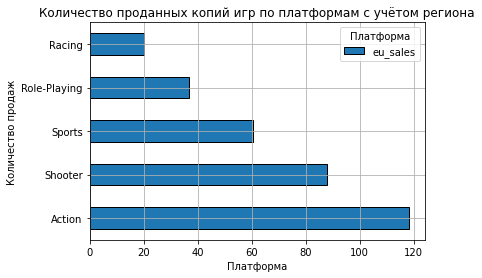

In [50]:
# визуализируем на графике полученную информацию
eu_genre.plot(kind='barh', legend=True, grid=True, ec='black', figsize=(6, 4))
plt.title('Количество проданных копий игр по платформам с учётом региона')
plt.legend(title='Платформа')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.show()

В Европе можно наблюдать аналогичную ситуацию с популяронстью жанров. В Европе более популяерн жанр авто-симуляторов ('racing'), с Америке жанр 'разное' (misc).

### 4.2.3 Азия.

In [51]:
# построим сводную таблицу жанров игр с учётом региона
jp_genre = actual_target_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').nlargest(5,'jp_sales')
jp_sales.sort_values('jp_sales', ascending=False)

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


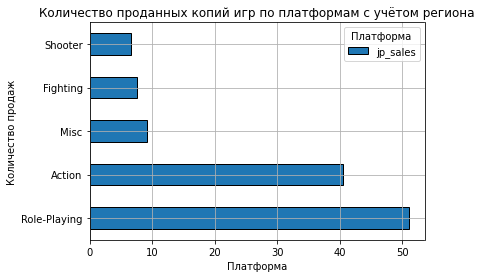

In [52]:
# визуализируем на графике полученную информацию
jp_genre.plot(kind='barh', legend=True, grid=True, ec='black', figsize=(6, 4))
plt.title('Количество проданных копий игр по платформам с учётом региона')
plt.legend(title='Платформа')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.show()

В Азии как и с типом популярных платформ, абсолютное расхождение в популярности жанров. Наиболее популярные жанры ролевых игр ('role-playing') и экшенов ('action'), наименее популярным жанром является шутер ('shooter')	

Жанр Action, очевидно, на первых местах на Западе и Европе, в Японии - второе место. Отличительная черта топ-5 жанров по продажам в Америке и Европе это 5 место: жанр Misc в Америке и  жанр Racing в Европе. Кроме того, в Японии на первом месте по популярности не свойственный другим регионам жанр Role-Playing.

## 4.3 Влияние рейтинга ESRB на продажи в отдельном регионе.

Посмотрим как влияет рейтинг ESRB на продажи в отдельных регионах. Для этого создадим сводные таблицы. 

**EC** - Для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует.\
**E** - Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика.\
**E 10+** - Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей.\
**T** - Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия.\
**M** - Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков.\
**AO** - Подходит для взрослых старше 18 лет. Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства. Также может присутствовать романтизация наркотиков, азартных игр и сексуальной активности.\
**RP** - Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.

Источник: (https://www.esrb.org/ratings-guide/) 

In [53]:
# создадим цикл, который исключит значения с -1 из столбца 'rating' и создаст таблицы
# регионов с соответствием оценок и количества проданых игр с данными оценками
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    region = (actual_target_data[actual_target_data['rating'] != -1].
              pivot_table(index='rating', values=column, aggfunc='sum').
              sort_values(column, ascending=False)
             )
# посчитаем долю оценок от их общего количества по регионам    
    region['ratio'] = round(region[column] / region[column].sum(), 2)
    display(region)

,na_sales,ratio
rating,,
M,165.21,0.47
E,79.05,0.23
E10+,54.24,0.16
T,49.79,0.14


,eu_sales,ratio
rating,,
M,145.32,0.46
E,83.36,0.27
E10+,42.69,0.14
T,41.95,0.13


,jp_sales,ratio
rating,,
T,20.59,0.37
E,15.14,0.27
M,14.11,0.25
E10+,5.89,0.11


Части света снова отличаются по популярности рейтингов. В Америке и Европе популярностью пользуются игры для лиц старше 17 лет, тогда как на Востоке первое место по продажам принадлежит играм для подростков. Взрослые игры в Азии лишь на третьем месте по популярности. Второе местро во всех регионах принадлежит рейтингу E.

**Вывод:** 

По анализу регионов можно составить портрет игрока.

Пользователь из Северной Америки -  со средним возрастом 17 лет, в основном отдаёт предпочтение PS4, наибольшим спросом пользуются игры в жанрах 'action' и 'shooter'. Пользователь из Европы - со средним возрастом 17 лет, в основном отдаёт предпочтение PS4, наибольшим спросом пользуются игры так же в жанрах 'action' и 'shooter'. Пользователь из Азии - со средним возрастом 13 лет, наибольшим спросом пользуется полатформа 3DS, предпочтение отдаёт таким жанрам как 'role-playing' и экшенов 'action'.

# 5. Проверка гипотез.

Так как гипотезы будем проверять в отношении пользовательских рейтингов, исключим из расчета ранее проставленные маркеты '-1' в данном стобце.

## 5.1 Гипотеза 1.

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?

Проверим гипотезу: **средние пользовательские рейтинги платформ Xbox One и PC одинаковые.** 

**H_0:** Средние пользовательские рейтинги платформы Xbox One = средние пользовательские рейтинги PC 

**H_1:** Средние пользовательские рейтинги платформы Xbox One != средние пользовательские рейтинги PC 

**Уровень стат. значимости alpha = 0.05**

In [54]:
xone = actual_target_data.query('platform == "XOne" and (user_score != -1)')['user_score']
pc = actual_target_data.query('platform == "PC" and (user_score != -1)')['user_score']

alpha = .05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(xone, pc, equal_var=False)

print('p-value равно:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value равно: 0.147597032047728
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Нулевую гипотезу отвергнуть не получилось, вероятнее всего средние пользовательские рейтинги платформ очень близки. 

## 5.2 Гипотеза 2.

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные?

Проверим гипотезу: **средние пользовательские рейтинги жанров Action и Sports разные** 

**H_0:** Средние пользовательские рейтинги жанра Action = средние пользовательские рейтинги жанра Sports

**H_1:** Средние пользовательские рейтинги жанра Action != средние пользовательские рейтинги жанра Sports  

**Уровень стат. значимости alpha = 0.05**

In [55]:
action = actual_target_data.query('genre == "Action" and (user_score != -1)')['user_score']
sports = actual_target_data.query('genre == "Sports" and (user_score != -1)')['user_score']

alpha = .05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(action, sports, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4459989209941613e-20
Отвергаем нулевую гипотезу


Нулевая гипотеза не подтвердилась, cредние пользовательские рейтинги жанров имеют статистически значимое различие. 

# 6. Общий вывод: 

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры и нам необходимо было провести исследование. Из открытых источников нам были доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо было выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

По результату вывода информации о датафрейме увидели, что присутствуют пропуски, вероятно возникшие в процессе сбора данных из разных источников или в системе были какие-либо сбои при логировании.
Так же, возможно, возникли технические проблемы при передаче или хранении данных. Ко всему прочему, пропуски в рейтинговых столбцах может быть связано с отсутствием на момент выхода игры (если игра вышла до 1995) развитых рейтинговых площадок.

Проверено наличие явных и неявных дубликатов. Явные дубликаты отсутствовали, однако нашли один неявный дубликат и исключили его из датасета.

Наименование столбцов привели к нижниму регистру.

Для проведения анализа изменили тип данных некоторых столбцов.\
Столбец 'Year_of_Release' привели к целочисленному типу - int.\
Столбец 'Critic_Score' так же привели к целочисленному типу - int.\
Столбец 'User_Score' привели к вещественному типу данных - float.

В столбце User_Score помимо пропусков присутствовало значение 'tbd' ('to be determined' - 'будет определено'), означающее, что оценка игры на момент занесения в БД отсутствовала.
Для проведения корректного анализа, мы заменили данные значение и 'Nan' на -1 для отсутствия пиков на графиках для данных значений и учли это в процессе анализа.\
Аналогичным образом поступили с пропущенными значениями столбцов 'rating', 'critic_score'.

Пропуски в столбцах  'name' и 'genre' исключили, тк найти информацию и заполнить пропуски не представляется возможным. 

Обратили внимание, что в столбце названия спортивных игр часто встречается упоминание года или сезона, соответственно релиз игры происходит накануне года указанного в названии. Этим можно было воспользоваться и заполнить пропуски столбца 'year_of_release', однако вариаций написания очень много: Madden NFL 11, MLB SlugFest 20-03, NASCAR Thunder 2003. В своём большинестве пропуски относятся к 'вымершим' платформам на 2006 год, к тому же пропусков менее 1%, а игры без года создания не нужны поэтому отбросили их.

Создан дополнительный столбец с данными о суммарных продажах по всем регионам 'total_sales'. 

Был проведен статистический анализ данных и мы выяснили, что начиная с 1993 года в мире растет число продаж игр и игровая индустрия интенсивно равивается. Тенденция выпускать больше игр пришла вместе с технологическим прорывом: появлением почти в каждом доме персонального компьютера и технологий языков программирования. После 2009 года наблюдаентся резкий спад спроса. К 2012 году количество продаж снизилось вдвое по сравнению с успехами 2008 - 2009 годов. Вероятнее всего это связано с долгосрочными последствиями мирового экономического кризиса начавшимся в конце 2007 - начале 2008 годов.

Данные до 1994 года, на заре развития индустрии не несут в себе необходимой для анализа информации.\
В тройке лидеров по исходным данным такие платформы как: PS2, X360, PS3. Так же мы наблюдали, что и продолжительность актуальности данных платформ так же высока. По данным актуальным для проведения анализа, в своей активной коммерческой фазе на текущей момент пребывает платформа PS4, тогда как лидеры по продажам 2011 - 2013 гг: PS3 и X360, — к 2015-2016 гг. уже исчерпали свой коммерческий ресурс.

Мы выяснили, что в среднем платформа живет около 7 лет и за интересующий нас период взяли 2013-2016 гг. Это период активной фазы платформы PS4, поэтому выбрали её как потенциально прибыльную, вклад остальных платформ в прогноз 2017 года не значителен.\
В целом к лидерам по продажам за выбранный период времени(2013-2016 гг.) относятся PS4, PS3 и XOne. Самые низкие доходы от продаж игр на PSP, Wii, PSV. При этом к лидерам по средним продажам относятся X360, XOne, WiiU и Wii.\
Выяснили, что отзывы пользователей никак не влияют на продажи игр, в то время как отзывы критиков имеют некоторое влияние на продажи. Заметили зависимость отзывов критиков и отзывами пользователей.\
Проверили, что для всех платформ характерно среднее влияние отзывов критиков на продажи и отсутствие влияния отзывов пользователей.\
Определили, что жанр 'shooter' по средним продажам лидирует по сравнению с остальными жанрами игр. Спортивные игры 'sports' и платформеры 'platform' так же имеют высокие продажи в среднем.\
Жанр 'action', наоборот, по этому критерию отстает, в тоже время является в целом самым популярным жанром из-за наибольшего объема продаж. Приключенческие игры 'adventure' и игры-головоломки 'puzzle' вызывают наименьший интерес среди пользователей. Их абсолютные и средние продажи одни из самых низких среди всех жанров.

**Выяснили жанры самых продаваемых игр за все время:**
Обнаружили что первой тройке отсутствует жанр 'shooter', а наоборот является одим из самых непродаваемых за все время. Вероятно, это связано с тем, что жанр 'shooter' в том виде, в котором мы его знаем на сегодняшней день относительно молодой и появился с развитием компьютерных технологий.\
В свою очередь самые популярные жанры самых продаваемых игр за все время: 'sports', 'action' и 'platform.

**По анализу регионов составили портреты пользователей:**
Пользователь из Северной Америки - со средним возрастом 17 лет, в основном отдаёт предпочтение PS4, наибольшим спросом пользуются игры в жанрах 'action' и 'shooter'.\
Пользователь из Европы - со средним возрастом 17 лет, в основном отдаёт предпочтение PS4, наибольшим спросом пользуются игры так же в жанрах 'action' и 'shooter'.\
Пользователь из Азии - со средним возрастом 13 лет, наибольшим спросом пользуется полатформа 3DS, предпочтение отдаёт таким жанрам как 'role-playing' и экшенов 'action'.

**Проверили гипотезы:**

1) Гипотеза 1: **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.** Нулевую гипотезу отвергнуть не удалось, сделали выводы, что вероятнее всего средние пользовательские рейтинги платформ очень близки. 

2) Гипотеза 2: **Cредние пользовательские рейтинги жанров Action и Sports разные.** Нулевая гипотеза не подтвердилась, сделали выводы, что cредние пользовательские рейтинги жанров имеют статистически значимое различие.

По проведенному анализу и выявленным закономерностям определяющим успешность игры можно сделать выводы:
1) Игры должны быть разработаны для набирающих популярность платформ PS4 или XOne, если речь идет о западном рынке, и — для платформы 3DS, если игры планируется продавать в Японии.
2) самыми популярными жанрами являются: Action или Shooter для западного рынка и Role-Playing — для азиатского.
3) Учесть ограничение по возрасту по рейтингу ESRB: для аудитории от 17 лет (для Америки и Европы) или от 13 лет (для Японии).

Необходимо учитывать, что не стоит ориентироваться на оценки пользователей прошлих лет так как на продажи это не оказывает существенного влияния. В тоже время отзывы критиков не стоит упускать из внимания, их отзывы имеют значение. Тем не менее, если пользовательский рейтинг все-таки будет важен создателям игры, то необходимо знать, что в жанре 'Sports' рейтинг пользователей, как правило, выше, чем в жанре 'Action'.